# Final

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import collections
import networkx as nx
import matplotlib.gridspec as gridspec

%matplotlib inline

plt.style.use('fivethirtyeight')

## Load data

In [2]:
df = pd.read_csv('final.csv')

/Users/smartiiv/anaconda3/envs/data_visualisation/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
color_cat = {'PC':'#28005c',
             'Retro Gaming & Microconsoles':'#710060',
             'Mac':'#ab0057',
             'PlayStation':'#d61a44',
             'Nintendo':'#f15a29',
             'Accessories':'#f99300',
             'Xbox':'#eeca00',
             'Wii':'#ceff2e'}

In [4]:
df.head()

,asin,overall,verified,timestamp,month,year,unixReviewTime,reviewerID,vote,count,cat2,rank,also_view,also_buy
0,0439381673,1.0,True,2014-06-09,6,2014,1402272000,A21ROB4YDOZA5P,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN
1,0439381673,3.0,True,2014-05-10,5,2014,1399680000,A3TNZ2Q5E7HTHD,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN
2,0439381673,4.0,True,2014-02-07,2,2014,1391731200,A1OKRM3QFEATQO,15,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN
3,0439381673,1.0,True,2014-02-07,2,2014,1391731200,A2XO1JFCNEYV3T,11,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN
4,0439381673,4.0,True,2014-01-16,1,2014,1389830400,A19WLPIRHD15TH,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN


In [5]:
df.loc[:,'timestamp'] = pd.to_datetime(df.loc[:,'timestamp'])

In [6]:
#check if there is review for the whole year of 2018

a = df[df['year']==2018]
a[a['month']>10]
#year 2018 only contains data from Jan to October

,asin,overall,verified,timestamp,month,year,unixReviewTime,reviewerID,vote,count,cat2,rank,also_view,also_buy


## Clean

In [7]:
#remove insignificant category
remove = df[df['cat2'] == 'Digital Games'].index
df.drop(remove,inplace=True)
remove2 = df[df['cat2'] == ''].index
df.drop(remove2,inplace=True)
remove3 = df[df['cat2'] == 'Kids & Family'].index
df.drop(remove3,inplace=True)
remove4 = df[df['verified']== False].index
df.drop(remove4,inplace=True)

#remove5 = df[df['year']==2018].index
#df.drop(remove5, inplace=True)

In [8]:
df0 = df.groupby('asin')['timestamp'].agg(['min','max']).reset_index()

In [9]:
df0.head()

,asin,min,max
0,0042000742,2015-03-11,2015-03-11
1,0078764343,2013-07-07,2013-08-24
2,0276425316,2017-01-04,2017-01-04
3,0324411812,2015-09-11,2015-09-11
4,0439335299,2014-12-07,2014-12-07


In [10]:
df0.loc[:,'min'] = pd.to_datetime(df0.loc[:,'min'])
df0.loc[:,'max'] = pd.to_datetime(df0.loc[:,'max'])

In [11]:
df0.loc[:,'delta'] = df0['max'] - df0['min']

In [12]:
df = pd.merge(df,df0, how='left')

In [13]:
#clean data
remove0 = df[df['delta'].dt.days < 182].index

df.drop(remove0, inplace=True)

## Plot

In [14]:
df.loc[:,'duration'] = df['timestamp'] - df['min']

In [15]:
remove = df[df['duration'].dt.days > 182].index

df0 = df.drop(remove)

remove = df0[df0['duration'].dt.days < 1].index
df0 = df0.drop(remove)

In [16]:
df0.loc[:,'duration_month'] = round(df0['duration'] / np.timedelta64(1,'M'),0)

In [17]:
df0.head()

,asin,overall,verified,timestamp,month,year,unixReviewTime,reviewerID,vote,count,cat2,rank,also_view,also_buy,min,max,delta,duration,duration_month
80,0700099867,5.0,True,2011-08-14,8,2011,1313280000,AN3YYDZAS3O1Y,11,1,PC,">#50,093 in Video Games (See Top 100 in Video ...",NaN,NaN,2011-06-14,2016-11-21,1987 days,61 days,2.0
81,0700099867,4.0,True,2011-07-27,7,2011,1311724800,A3BQMSVKFEZHLU,NaN,1,PC,">#50,093 in Video Games (See Top 100 in Video ...",NaN,NaN,2011-06-14,2016-11-21,1987 days,43 days,1.0
99,0700026398,2.0,True,2013-09-27,9,2013,1380240000,A2IPY9UTB8JEU5,NaN,1,PC,">#58,163 in Video Games (See Top 100 in Video ...",NaN,NaN,2013-05-18,2017-01-18,1341 days,132 days,4.0
100,0700026398,5.0,True,2013-09-04,9,2013,1378252800,A2ICCE41Z2LWZ5,NaN,1,PC,">#58,163 in Video Games (See Top 100 in Video ...",NaN,NaN,2013-05-18,2017-01-18,1341 days,109 days,4.0
101,0700026398,4.0,True,2013-06-26,6,2013,1372204800,A1DQYK20U6BP0V,NaN,1,PC,">#58,163 in Video Games (See Top 100 in Video ...",NaN,NaN,2013-05-18,2017-01-18,1341 days,39 days,1.0


In [18]:
dff = pd.DataFrame(df0.groupby(['cat2','asin','duration_month'])['count'].agg(np.sum)).reset_index()

In [19]:
dff = pd.DataFrame(dff.groupby(['cat2', 'duration_month'])['count'].agg(np.mean)).reset_index()

In [20]:
dff.head()

,cat2,duration_month,count
0,Accessories,0.0,1.477745
1,Accessories,1.0,1.992495
2,Accessories,2.0,2.392193
3,Accessories,3.0,2.669104
4,Accessories,4.0,2.391389


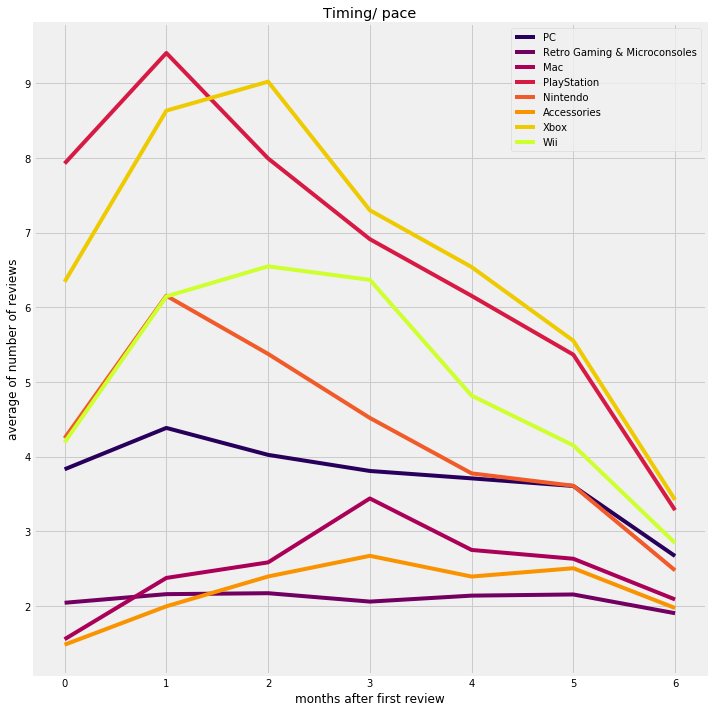

In [21]:
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(111)

for i in color_cat:
    a = dff[dff['cat2'] == i]
    x = a['duration_month']
    y = a['count']
    ax.plot(x,y, label=i,color= color_cat[i])



ax.set_title('Timing/ pace')
ax.set_xlabel('months after first review')
ax.set_ylabel('average of number of reviews')
ax.legend(loc='best')
    
fig.tight_layout()
plt.show()
#fig.savefig('1')

In [22]:
remove = df[df['duration'].dt.days > 182].index

df0 = df.drop(remove)

In [23]:
df0 = pd.DataFrame(df0.groupby(['cat2','year'])['count'].agg(np.sum)).reset_index()

In [24]:
df0

,cat2,year,count
0,Accessories,2001,2
1,Accessories,2006,7
2,Accessories,2007,40
3,Accessories,2008,176
4,Accessories,2009,211
...,...,...,...
123,Xbox,2014,20570
124,Xbox,2015,25785
125,Xbox,2016,24649
126,Xbox,2017,6406


In [25]:
cat = set(df0['cat2'])

a = [i for i in cat for k in range(20)]
b = [i for k in range(8) for i in np.arange(1999,2019,1)]
c = [0 for k in range(160)]

d = {
    'cat2': a,
    'year': b,
    'count': c
}

d = pd.DataFrame(d)

In [26]:
df0 =pd.concat([df0,d],axis=0)

In [27]:
df0 = pd.DataFrame(df0.groupby(['cat2', 'year'])['count'].agg(np.sum)).reset_index()

In [28]:
df0

,cat2,year,count
0,Accessories,1999,0
1,Accessories,2000,0
2,Accessories,2001,2
3,Accessories,2002,0
4,Accessories,2003,0
...,...,...,...
155,Xbox,2014,20570
156,Xbox,2015,25785
157,Xbox,2016,24649
158,Xbox,2017,6406


In [29]:
a = df0[df0['cat2'] == 'PC']
x = np.array(a['year'])
y = np.array(a['count'])


a = df0[df0['cat2'] == 'Retro Gaming & Microconsoles']
x2 = np.array(a['year'])
y2 = np.array(a['count'])

a = df0[df0['cat2'] == 'Mac']
x3 = np.array(a['year'])
y3 = np.array(a['count'])

a = df0[df0['cat2'] == 'PlayStation']
x4 = np.array(a['year'])
y4 = np.array(a['count'])


a = df0[df0['cat2'] == 'Nintendo']
x5 = np.array(a['year'])
y5 = np.array(a['count'])


a = df0[df0['cat2'] == 'Accessories']
x6 = np.array(a['year'])
y6 = np.array(a['count'])

a = df0[df0['cat2'] == 'Xbox']
x7 = np.array(a['year'])
y7 = np.array(a['count'])

a = df0[df0['cat2'] == 'Wii']
x8 = np.array(a['year'])
y8 = np.array(a['count'])

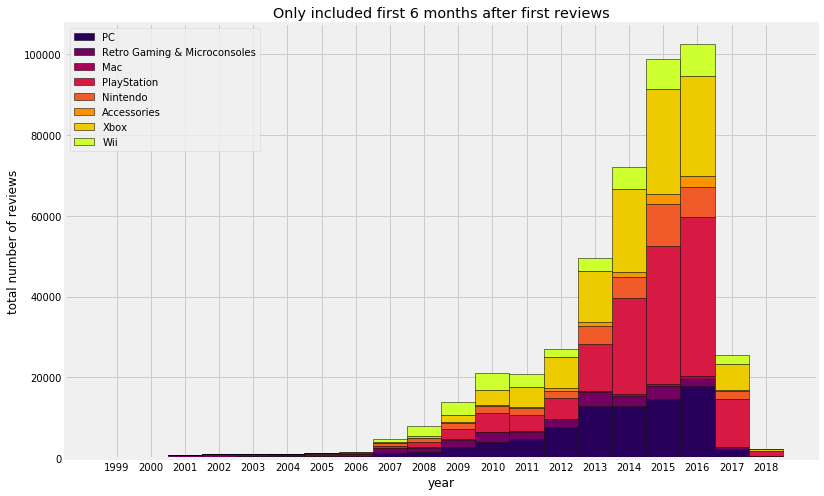

In [30]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111, xticks=x, xticklabels =x)


ax.bar(x,y, width=1, label='PC', color=color_cat['PC'], ec='k')
ax.bar(x2,y2, width=1, bottom=y, label='Retro Gaming & Microconsoles',color=color_cat['Retro Gaming & Microconsoles'], ec='k')
ax.bar(x3,y3, width=1, bottom=y2+y, label='Mac',color=color_cat['Mac'], ec='k')
ax.bar(x4,y4, width=1, bottom=y3+y+y2, label='PlayStation',color=color_cat['PlayStation'], ec='k')
ax.bar(x5,y5, width=1, bottom=y4+y+y2+y3, label='Nintendo',color=color_cat['Nintendo'], ec='k')
ax.bar(x6,y6, width=1, bottom=y5+y+y2+y3+y4, label='Accessories',color=color_cat['Accessories'], ec='k')
ax.bar(x7,y7, width=1, bottom=y6+y+y2+y3+y4+y5, label='Xbox',color=color_cat['Xbox'], ec='k')
ax.bar(x8,y8, width=1, bottom=y7+y+y2+y3+y4+y5+y6, label='Wii',color=color_cat['Wii'], ec='k')


ax.legend(loc='best')
ax.set_xlabel('year')
ax.set_ylabel('total number of reviews')
ax.set_title('Only included first 6 months after first reviews')

    
plt.show()
#fig.savefig('2')

In [31]:
a = pd.DataFrame(df.groupby('year')['count'].agg(np.sum)).reset_index()
X = a['year']
Y = a['count']

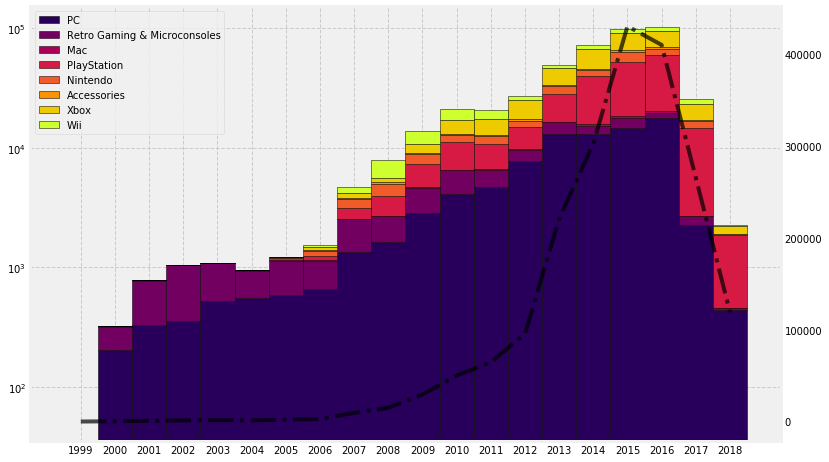

In [32]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111, xticks=x, xticklabels =x)


ax.bar(x,y, width=1, label='PC', color=color_cat['PC'], ec='k')
ax.bar(x2,y2, width=1, bottom=y, label='Retro Gaming & Microconsoles',color=color_cat['Retro Gaming & Microconsoles'], ec='k')
ax.bar(x3,y3, width=1, bottom=y2+y, label='Mac',color=color_cat['Mac'], ec='k')
ax.bar(x4,y4, width=1, bottom=y3+y+y2, label='PlayStation',color=color_cat['PlayStation'], ec='k')
ax.bar(x5,y5, width=1, bottom=y4+y+y2+y3, label='Nintendo',color=color_cat['Nintendo'], ec='k')
ax.bar(x6,y6, width=1, bottom=y5+y+y2+y3+y4, label='Accessories',color=color_cat['Accessories'], ec='k')
ax.bar(x7,y7, width=1, bottom=y6+y+y2+y3+y4+y5, label='Xbox',color=color_cat['Xbox'], ec='k')
ax.bar(x8,y8, width=1, bottom=y7+y+y2+y3+y4+y5+y6, label='Wii',color=color_cat['Wii'], ec='k')
ax.grid(ls='--')

ax.legend(loc='best')
ax.set_yscale('log')

ax2 = ax.twinx()
ax2.plot(X,Y,color='k',alpha=0.7,ls='-.')
ax2.grid(ls='')

plt.show()

In [33]:
#transform y into %
total = y+y2+y3+y4+y5+y6+y7+y8
y_percnt = y/total
y_percnt2 = y2/total
y_percnt3 = y3/total
y_percnt4 = y4/total
y_percnt5 = y5/total
y_percnt6 = y6/total
y_percnt7 = y7/total
y_percnt8 = y8/total

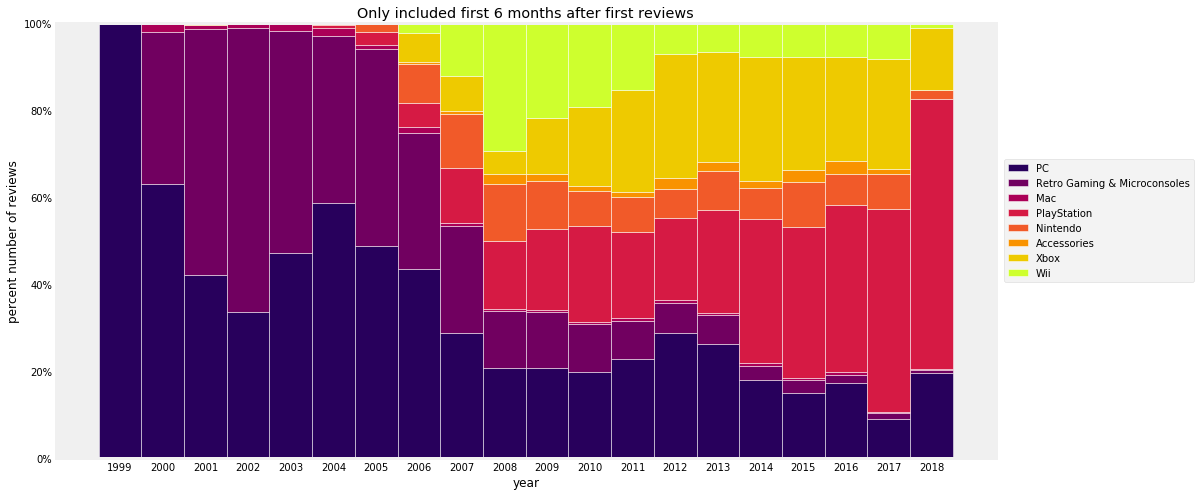

In [34]:
fig = plt.figure(figsize=(15,8))


ax = fig.add_subplot(111, xticks=x, xticklabels =x, yticklabels=['0%','20%','40%','60%','80%','100%'])


ax.bar(x,y_percnt, width=1,
       label='PC', color=color_cat['PC'], ec='white')
ax.bar(x2,y_percnt2, width=1, bottom=y_percnt,
       label='Retro Gaming & Microconsoles', color=color_cat['Retro Gaming & Microconsoles'], ec='white')
ax.bar(x3,y_percnt3, width=1, bottom=y_percnt2+y_percnt,
       label='Mac', color=color_cat['Mac'], ec='white')
ax.bar(x4,y_percnt4, width=1, bottom=y_percnt3+y_percnt+y_percnt2,
       label='PlayStation', color=color_cat['PlayStation'], ec='white')
ax.bar(x5,y_percnt5, width=1, bottom=y_percnt4+y_percnt+y_percnt2+y_percnt3,
       label='Nintendo', color=color_cat['Nintendo'], ec='white')
ax.bar(x6,y_percnt6, width=1, bottom=y_percnt5+y_percnt+y_percnt2+y_percnt3+y_percnt4,
       label='Accessories', color=color_cat['Accessories'], ec='white')
ax.bar(x7,y_percnt7, width=1, bottom=y_percnt6+y_percnt+y_percnt2+y_percnt3+y_percnt4+y_percnt5,
       label='Xbox', color=color_cat['Xbox'], ec='white')
ax.bar(x8,y_percnt8, width=1, bottom=y_percnt7+y_percnt+y_percnt2+y_percnt3+y_percnt4+y_percnt5+y_percnt6,
       label='Wii', color=color_cat['Wii'], ec='white')

ax.grid('')
ax.set_xlabel('year')
ax.set_ylabel('percent number of reviews')
ax.set_title('Only included first 6 months after first reviews')
ax.legend(loc='upper center', bbox_to_anchor=(1.11, 0.7), ncol=1)
    
plt.show()
#fig.savefig('2-1')

In [35]:
#remove = df[df['duration'].dt.days > 182].index

#df0 = df.drop(remove)

In [36]:
df1 = pd.DataFrame(df.groupby(['asin','year','cat2'])['count'].agg(np.sum)).reset_index()

In [37]:
df1.head()

,asin,year,cat2,count
0,043933702X,2013,PC,2
1,043933702X,2014,PC,1
2,043933702X,2015,PC,1
3,043933702X,2017,PC,2
4,0439339960,2010,PC,1


In [38]:
df1.loc[:,'total_count'] = df1.groupby('asin')['count'].transform(np.sum)

In [39]:
remove = df1[df1['total_count'] < 2000].index

df1.drop(remove, inplace=True)

In [40]:
df1

,asin,year,cat2,count,total_count
26314,B000087H7T,2003,Retro Gaming & Microconsoles,16,2212
26315,B000087H7T,2004,Retro Gaming & Microconsoles,2,2212
26316,B000087H7T,2005,Retro Gaming & Microconsoles,4,2212
26317,B000087H7T,2006,Retro Gaming & Microconsoles,8,2212
26318,B000087H7T,2007,Retro Gaming & Microconsoles,52,2212
...,...,...,...,...,...
182444,B016MAK38U,2017,PC,793,2066
182445,B016MAK38U,2018,PC,812,2066
185207,B019OB663A,2016,PC,699,2528
185208,B019OB663A,2017,PC,1066,2528


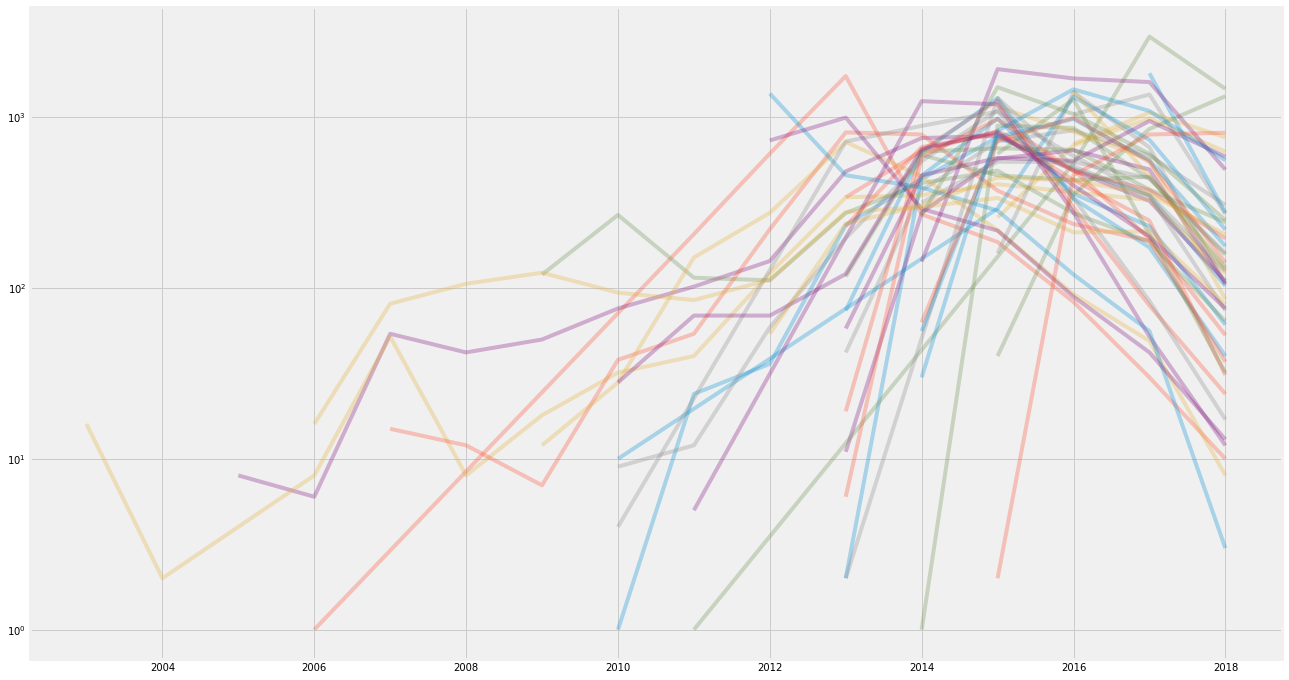

In [41]:
fig = plt.figure(figsize=(20,12))

ax = fig.add_subplot(111)

for i in set(df1['asin']):
    a = df1[df1['asin'] == i]
    x = a['year']
    y = a['count']
    ax.plot(x,y, alpha=0.3)
    
ax.set_yscale('log')
plt.show()

## Rank

In [42]:
dfnew = df['rank'].str.split('>',n=1,expand=True)

dfnew = dfnew[1].str.split('#', n=1, expand=True)

dfnew = dfnew[1].str.split(' ', n=1, expand=True)

In [43]:
dfnew = pd.DataFrame(dfnew[0])

In [44]:
dfnew.loc[:,'rank2'] = dfnew[0]

In [45]:
dfnew.drop(0, axis=1, inplace=True)

In [46]:
dfnew.head()

,rank2
0,"5,927"
1,"5,927"
2,"5,927"
3,"5,927"
4,"5,927"


In [47]:
dfnew = pd.DataFrame(dfnew['rank2'])

In [48]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023937 entries, 0 to 2056880
Data columns (total 1 columns):
rank2    object
dtypes: object(1)
memory usage: 110.9+ MB


In [49]:
df = pd.concat([df,dfnew], axis=1)

In [50]:
df.head()

,asin,overall,verified,timestamp,month,year,unixReviewTime,reviewerID,vote,count,cat2,rank,also_view,also_buy,min,max,delta,duration,rank2
0,0439381673,1.0,True,2014-06-09,6,2014,1402272000,A21ROB4YDOZA5P,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN,2012-10-29,2018-03-17,1965 days,588 days,"5,927"
1,0439381673,3.0,True,2014-05-10,5,2014,1399680000,A3TNZ2Q5E7HTHD,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN,2012-10-29,2018-03-17,1965 days,558 days,"5,927"
2,0439381673,4.0,True,2014-02-07,2,2014,1391731200,A1OKRM3QFEATQO,15,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN,2012-10-29,2018-03-17,1965 days,466 days,"5,927"
3,0439381673,1.0,True,2014-02-07,2,2014,1391731200,A2XO1JFCNEYV3T,11,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN,2012-10-29,2018-03-17,1965 days,466 days,"5,927"
4,0439381673,4.0,True,2014-01-16,1,2014,1389830400,A19WLPIRHD15TH,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN,2012-10-29,2018-03-17,1965 days,444 days,"5,927"


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023937 entries, 0 to 2056880
Data columns (total 19 columns):
asin              object
overall           float64
verified          bool
timestamp         datetime64[ns]
month             int64
year              int64
unixReviewTime    int64
reviewerID        object
vote              object
count             int64
cat2              object
rank              object
also_view         object
also_buy          object
min               datetime64[ns]
max               datetime64[ns]
delta             timedelta64[ns]
duration          timedelta64[ns]
rank2             object
dtypes: bool(1), datetime64[ns](3), float64(1), int64(4), object(8), timedelta64[ns](2)
memory usage: 375.3+ MB


In [52]:
# need to convert rank2 from object to integer

In [53]:
dfnew = pd.DataFrame(df[['asin','overall','rank2','count','cat2']])
dfnew.head()

,asin,overall,rank2,count,cat2
0,0439381673,1.0,"5,927",1,PC
1,0439381673,3.0,"5,927",1,PC
2,0439381673,4.0,"5,927",1,PC
3,0439381673,1.0,"5,927",1,PC
4,0439381673,4.0,"5,927",1,PC


In [54]:
dfnew.dropna(inplace=True)

In [55]:
a = dfnew['rank2'].str.split(',')

b= []

for i in a:
    if len(i) == 2:
        b.append(int(i[0]+i[1]))
    elif len(i) ==3:
        b.append(int(i[0]+i[1]+i[2]))
    else:
        b.append(int(i[0]))

In [56]:
b = pd.DataFrame(b, columns=['rank2'])
b

,rank2
0,5927
1,5927
2,5927
3,5927
4,5927
...,...
1950712,434
1950713,434
1950714,434
1950715,434


In [57]:
dfnew

,asin,overall,rank2,count,cat2
0,0439381673,1.0,"5,927",1,PC
1,0439381673,3.0,"5,927",1,PC
2,0439381673,4.0,"5,927",1,PC
3,0439381673,1.0,"5,927",1,PC
4,0439381673,4.0,"5,927",1,PC
...,...,...,...,...,...
2056876,B01HJEBIAA,5.0,434,1,PC
2056877,B01HJEBIAA,5.0,434,1,PC
2056878,B01HJEBIAA,5.0,434,1,PC
2056879,B01HJEBIAA,5.0,434,1,PC


In [58]:
dfnew.drop(['rank2'],axis=1,inplace=True)

dfnew.drop(['rank2'], axis=1, inplace=True)

In [59]:
dfnew.reset_index(inplace=True)
b.reset_index(inplace=True)

In [60]:
dfnew

,index,asin,overall,count,cat2
0,0,0439381673,1.0,1,PC
1,1,0439381673,3.0,1,PC
2,2,0439381673,4.0,1,PC
3,3,0439381673,1.0,1,PC
4,4,0439381673,4.0,1,PC
...,...,...,...,...,...
1950712,2056876,B01HJEBIAA,5.0,1,PC
1950713,2056877,B01HJEBIAA,5.0,1,PC
1950714,2056878,B01HJEBIAA,5.0,1,PC
1950715,2056879,B01HJEBIAA,5.0,1,PC


In [61]:
dfnew = pd.concat([dfnew,b], axis=1)

In [62]:
dfnew

,index,asin,overall,count,cat2,index,rank2
0,0,0439381673,1.0,1,PC,0,5927
1,1,0439381673,3.0,1,PC,1,5927
2,2,0439381673,4.0,1,PC,2,5927
3,3,0439381673,1.0,1,PC,3,5927
4,4,0439381673,4.0,1,PC,4,5927
...,...,...,...,...,...,...,...
1950712,2056876,B01HJEBIAA,5.0,1,PC,1950712,434
1950713,2056877,B01HJEBIAA,5.0,1,PC,1950713,434
1950714,2056878,B01HJEBIAA,5.0,1,PC,1950714,434
1950715,2056879,B01HJEBIAA,5.0,1,PC,1950715,434


In [63]:
dfnew2 = pd.DataFrame(dfnew.groupby('asin')['overall'].agg(np.mean))

In [64]:
dfnew3 = pd.DataFrame(dfnew.groupby('asin')['count'].agg(np.sum))

In [65]:
dfnew4 = pd.DataFrame(dfnew.groupby('asin')['rank2'].agg(np.mean))

In [66]:
dfnew5 = pd.DataFrame(dfnew.drop_duplicates(['asin']))

In [67]:
dfnew5 = dfnew5[['asin', 'cat2']]

In [68]:
dfnew2.head()

,overall
asin,
043933702X,3.666667
0439339960,4.000000
0439342260,4.500000
0439381673,3.404762
0439394422,3.000000


In [69]:
dfnew3.head()

,count
asin,
043933702X,6
0439339960,3
0439342260,2
0439381673,42
0439394422,3


In [70]:
dfnew4.head()

,rank2
asin,
043933702X,51505
0439339960,87937
0439342260,114262
0439381673,5927
0439394422,64461


In [71]:
dfnew5.set_index('asin', inplace=True)

In [72]:
dfnewfinal = pd.concat([dfnew2,dfnew3,dfnew4,dfnew5],axis=1, sort=False)

In [73]:
dfnewfinal.reset_index(inplace=True)

In [74]:
dfnewfinal

,index,overall,count,rank2,cat2
0,043933702X,3.666667,6,51505,PC
1,0439339960,4.000000,3,87937,PC
2,0439342260,4.500000,2,114262,PC
3,0439381673,3.404762,42,5927,PC
4,0439394422,3.000000,3,64461,PC
...,...,...,...,...,...
41724,B01HIZGKOE,3.346154,26,5207,PlayStation
41725,B01HJ14FDA,5.000000,3,36386,PlayStation
41726,B01HJ14TTA,3.666667,3,62150,PlayStation
41727,B01HJC33WS,4.571429,21,16087,Xbox


In [75]:
drop = dfnewfinal[dfnewfinal['count'] < 11].index

dfnewfinal.drop(drop,inplace=True)

In [76]:
dfnewfinal

,index,overall,count,rank2,cat2
3,0439381673,3.404762,42,5927,PC
17,0700026398,4.111111,18,58163,PC
19,0700026657,3.301887,53,30230,PC
20,0700099867,3.435897,78,50093,PC
31,1616616873,4.727273,11,69172,PC
...,...,...,...,...,...
41721,B01HIU43S4,3.076923,13,57498,Accessories
41722,B01HIZF7XE,4.706587,167,2260,Xbox
41724,B01HIZGKOE,3.346154,26,5207,PlayStation
41727,B01HJC33WS,4.571429,21,16087,Xbox


In [77]:
dfnewfinal.sort_values('rank2', inplace=True)

# reverse rank
dfnewfinal.loc[:,'rank3'] = dfnewfinal['rank2'].values[::-1]

In [78]:
dfnewfinal1 = dfnewfinal[dfnewfinal['cat2'] == 'Accessories']

dfnewfinal2 = dfnewfinal[dfnewfinal['cat2'] == 'Mac']

dfnewfinal3 = dfnewfinal[dfnewfinal['cat2'] == 'Nintendo']

dfnewfinal4 = dfnewfinal[dfnewfinal['cat2'] == 'PC']

dfnewfinal5 = dfnewfinal[dfnewfinal['cat2'] == 'PlayStation']

dfnewfinal6 = dfnewfinal[dfnewfinal['cat2'] == 'Retro Gaming & Microconsoles']

dfnewfinal7 = dfnewfinal[dfnewfinal['cat2'] == 'Wii']

dfnewfinal8 = dfnewfinal[dfnewfinal['cat2'] == 'Xbox']

In [79]:

y1 = dfnewfinal1['rank3']
z1 = dfnewfinal1['overall'] **3.5
x1 = dfnewfinal1['count']

y2 = dfnewfinal2['rank3']
z2 = dfnewfinal2['overall']**3.5
x2 = dfnewfinal2['count']

y3 = dfnewfinal3['rank3']
z3 = dfnewfinal3['overall']**3.5
x3 = dfnewfinal3['count']

y4 = dfnewfinal4['rank3']
z4 = dfnewfinal4['overall']**3.5
x4 = dfnewfinal4['count']

y5 = dfnewfinal5['rank3']
z5 = dfnewfinal5['overall']**3.5
x5 = dfnewfinal5['count']

y6 = dfnewfinal6['rank3']
z6 = dfnewfinal6['overall']**3.5
x6 = dfnewfinal6['count']

y7 = dfnewfinal7['rank3']
z7 = dfnewfinal7['overall']**3.5
x7 = dfnewfinal7['count']

y8 = dfnewfinal8['rank3']
z8 = dfnewfinal8['overall']**3.5
x8 = dfnewfinal8['count']

In [80]:
dfnewfinal

,index,overall,count,rank2,cat2,rank3
39602,B01AZC3III,4.095868,605,1,PC,4952385
41618,B01H6GUCCQ,4.166523,1159,1,PC,3451907
31938,B00KQFO12W,4.398577,562,1,PC,2191766
30720,B00IEUVTNU,3.355422,166,1,Xbox,2040387
38194,B016MAK38U,4.413359,2066,1,PC,1889586
...,...,...,...,...,...,...
7094,B000235UU0,3.888889,54,1889586,PC,1
13993,B000VDJFIE,4.923077,13,2040387,Nintendo,1
33523,B00OC4D732,2.037037,27,2191766,Accessories,1
9554,B000B6OR4I,4.970238,168,3451907,Xbox,1


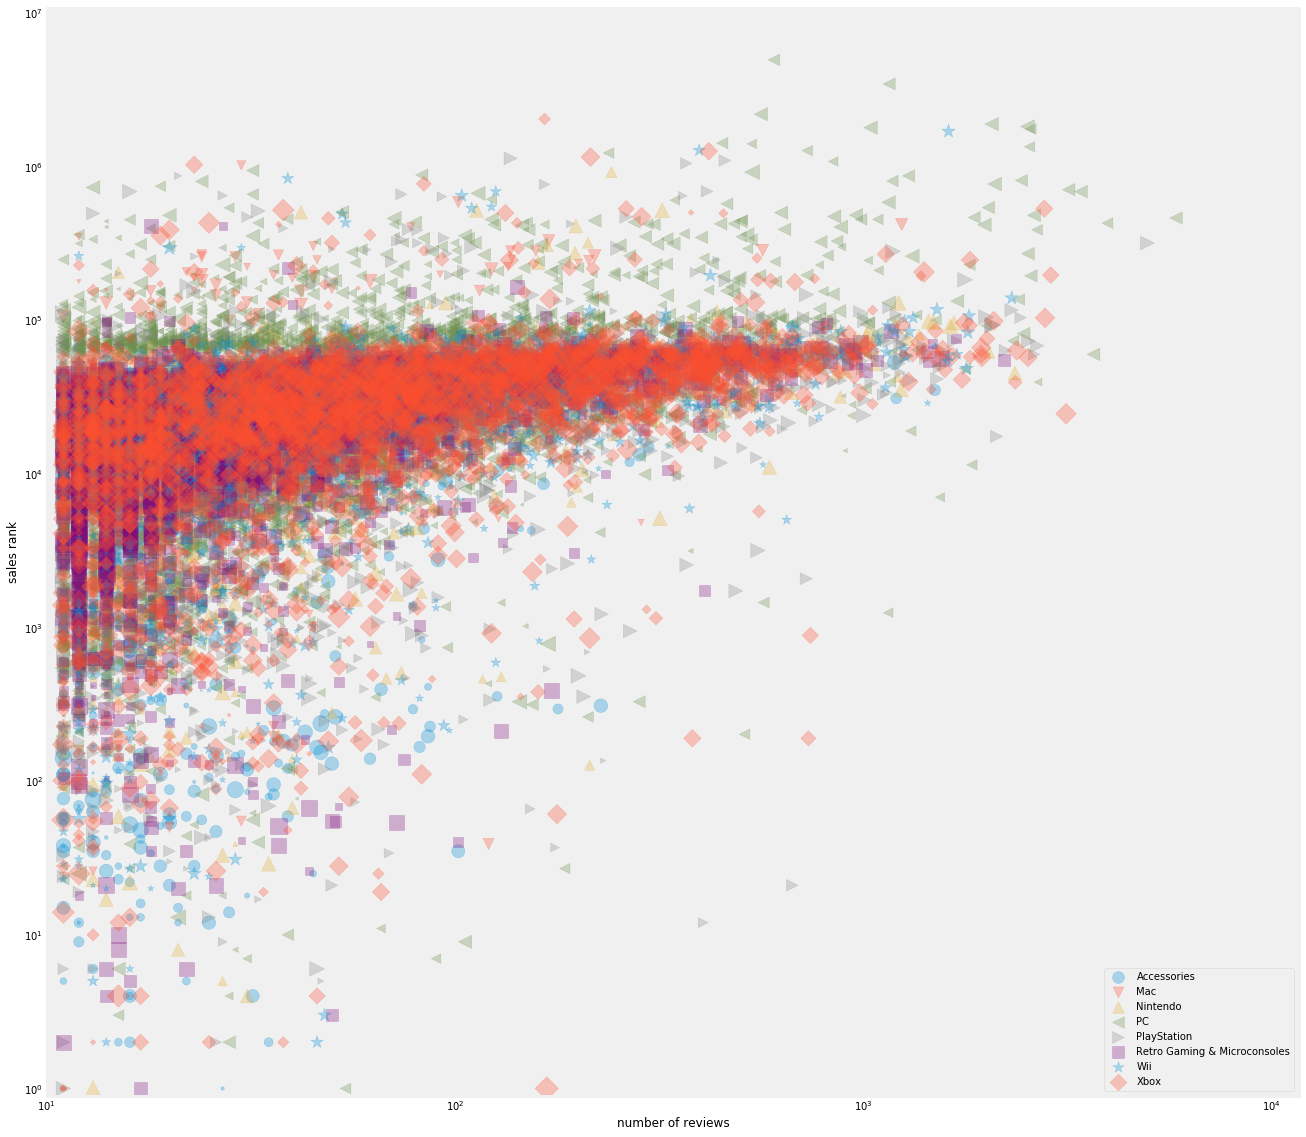

In [81]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(111)

ax.scatter(x1,y1, alpha=0.3, marker='o', label='Accessories',s=z1)
ax.scatter(x2,y2, alpha=0.3, marker='v', label='Mac',s=z2)
ax.scatter(x3,y3, alpha=0.3, marker='^', label='Nintendo',s=z3)
ax.scatter(x4,y4, alpha=0.3, marker='<', label='PC',s=z4)
ax.scatter(x5,y5, alpha=0.3, marker='>', label='PlayStation',s=z5)
ax.scatter(x6,y6, alpha=0.3, marker='s', label='Retro Gaming & Microconsoles',s=z6)
ax.scatter(x7,y7, alpha=0.3, marker='*', label='Wii',s=z7)
ax.scatter(x8,y8, alpha=0.3, marker='D', label='Xbox',s=z8)


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=10)
ax.set_ylim(ymin=0.9)

ax.set_xlabel('number of reviews')
ax.set_ylabel('sales rank')

ax.grid(ls='')
ax.legend(loc=4)

fig.tight_layout
plt.show()

In [82]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.formula.api as smf

In [83]:
m_0 = smf.ols('np.log(rank3) ~ np.log(count)',
              data = dfnewfinal)

m_0_res = m_0.fit()

print(m_0_res.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(rank3)   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     4458.
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:50:07   Log-Likelihood:                -35249.
No. Observations:               20320   AIC:                         7.050e+04
Df Residuals:                   20318   BIC:                         7.052e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.4831      0.035    216.682

In [84]:
m_0 = smf.ols('np.log(rank3) ~ np.log(count) + overall',
              data = dfnewfinal)

m_0_res = m_0.fit()

print(m_0_res.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(rank3)   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     2514.
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:50:07   Log-Likelihood:                -35018.
No. Observations:               20320   AIC:                         7.004e+04
Df Residuals:                   20317   BIC:                         7.007e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.1517      0.070     87.376

In [85]:
dfnewfinal.loc[:,'count2'] = 1
gr_cat2 = dfnewfinal.groupby('cat2')

In [86]:
dfnewfinal9 = pd.DataFrame(gr_cat2['count'].agg(np.mean))
dfnewfinal10 = pd.DataFrame(gr_cat2['count2'].agg(np.sum))
dfnewfinal11 = pd.DataFrame(gr_cat2['rank3'].agg(np.median))
dfnewfinal12 = pd.DataFrame(gr_cat2['overall'].agg(np.mean))

In [87]:
dfnewfinal9

,count
cat2,
Accessories,50.329618
Mac,52.398844
Nintendo,78.140124
PC,91.467379
PlayStation,112.958498
Retro Gaming & Microconsoles,55.109566
Wii,100.401696
Xbox,123.114702


In [88]:
dfnewfinal = pd.concat([dfnewfinal9,dfnewfinal10,dfnewfinal11],axis=1)

In [89]:
dfnewfinal.reset_index(inplace=True)

In [90]:
dfnewfinal

,cat2,count,count2,rank3
0,Accessories,50.329618,628,7549.5
1,Mac,52.398844,173,12950.0
2,Nintendo,78.140124,1934,24714.0
3,PC,91.467379,4491,17572.0
4,PlayStation,112.958498,3807,24916.0
5,Retro Gaming & Microconsoles,55.109566,4244,23410.5
6,Wii,100.401696,1887,25545.0
7,Xbox,123.114702,3156,26603.5


In [91]:
x = dfnewfinal['count']
y = dfnewfinal['rank3']
size = dfnewfinal['count2']
cat = dfnewfinal['cat2']

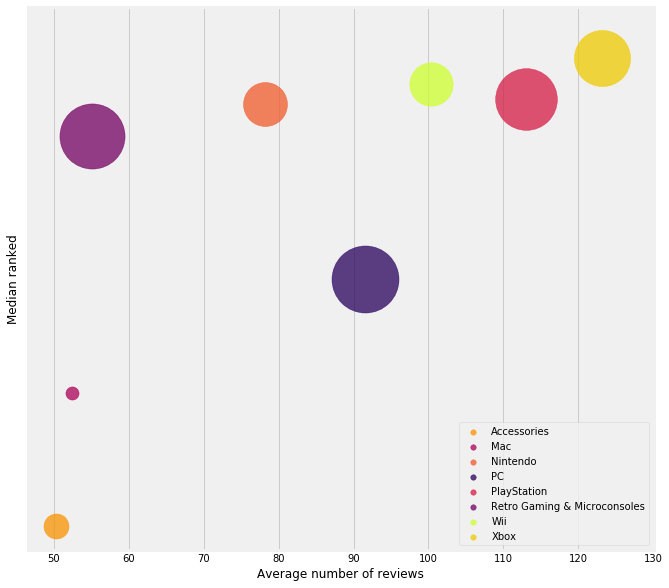

In [93]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, yticklabels=[])

for i in np.arange(0,8,1):
    ax.scatter(x[i],y[i], alpha=0.75, marker='o', label=cat[i],s=size[i], color= color_cat[cat[i]])



#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_ylim(bottom=20000,top=55000)
#ax.set_xlim(left=0)

ax.set_xlabel('Average number of reviews')
ax.set_ylabel('Median ranked')
ax.grid(axis='y')

legend = ax.legend(loc=4)
for i in np.arange(0,8,1):
    legend.legendHandles[i]._sizes = [30]

fig.tight_layout
plt.show()
#fig.savefig('3')

Ordinal variable is better fitted using 'median' than mean or mode

https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php

## Network (also_buy, also_view)

### Nintendo

df0 = df[['also_buy','also_view','asin', 'cat2']]

cat = df0[df0['cat2'] != 'Nintendo'].index
df0.drop(cat,inplace=True)

remove = df0[df0['duration'].dt.days > 182].index
df0.drop(remove,inplace=True)

df0.drop_duplicates(inplace=True)

df0

asin = df0['asin']

also_buy = list(df0['also_buy'])
also_view = list(df0['also_view'])  
node_list = list(asin)


edge_list = []     
for product, buy in zip(asin,also_buy):
    if type(buy) == str:
        buy = [a.strip() for a in buy.split(',')]
        if type(buy) == list:
            for buy2 in buy:
                buy2 = buy2.strip('[')
                buy2 = buy2.strip(']')
                buy2 = buy2.strip("\\'")
                buy2 = buy2.strip("\\'")
                
                if buy2 in node_list:
                    edge_list.append([product,buy2])
                if buy2 not in node_list:
                    pass
    else:
        pass



G = nx.DiGraph()

G.add_nodes_from(node_list)
G.add_edges_from(edge_list)


fig = plt.figure(figsize=(20,20))

pos = nx.layout.spring_layout(G)

# draw nodes
nodes = nx.draw_networkx_nodes(G, pos, nodelist=node_list, node_color='red', alpha=0.5)

# draw arrows
edges = nx.draw_networkx_edges(G, pos, edgelist=edge_list,edge_color='#62d2a2', rrowstyle='->',
                               arrowsize=30,alpha=0.4, width=1)



in_degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
in_degreeCount = collections.Counter(in_degree_sequence)
indeg, incnt = zip(*in_degreeCount.items())


out_degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
out_degreeCount = collections.Counter(out_degree_sequence)
outdeg, outcnt = zip(*out_degreeCount.items())

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)

plt.scatter(indeg, incnt, color='#393e46', alpha=0.7, label='In Degree')
plt.scatter(outdeg, outcnt, color='#f08a5d', alpha=0.7, label='Out Degree')

ax.set_title("Degree Distribution of Nintendo")
ax.set_ylabel("Count")
ax.set_xlabel("degree")
ax.set_yscale('log')
#ax.set_xscale('log')
ax.legend(loc='best')

plt.show()

edge_list = []
for product, view in zip(asin,also_view):
    if type(view) == str:
        view = [a.strip() for a in view.split(',')]
        if type(view) == list:
            for view2 in view:
                view2 = view2.strip('[')
                view2 = view2.strip(']')
                view2 = view2.strip("\\'")
                view2 = view2.strip("\\'")
                
                if view2 in node_list:
                    edge_list.append([product,view2])
                if view2 not in node_list:
                    pass
    else:
        pass



G2 = nx.DiGraph()

G2.add_nodes_from(node_list)
G2.add_edges_from(edge_list)


fig = plt.figure(figsize=(20,20))

pos = nx.layout.spring_layout(G2)

# draw nodes
#nodes = nx.draw_networkx_nodes(G2, pos, nodelist=node_list, node_color='red', alpha=0.5)

# draw arrows
#edges = nx.draw_networkx_edges(G2, pos, edgelist=edge_list,edge_color='#62d2a2', rrowstyle='->',arrowsize=30,alpha=0.4, width=1)



in_degree_sequence2 = sorted([d for n, d in G2.in_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
in_degreeCount2 = collections.Counter(in_degree_sequence2)
indeg2, incnt2 = zip(*in_degreeCount2.items())


out_degree_sequence2 = sorted([d for n, d in G2.out_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
out_degreeCount2 = collections.Counter(out_degree_sequence2)
outdeg2, outcnt2 = zip(*out_degreeCount2.items())

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)

plt.scatter(indeg2, incnt2, color='#393e46', alpha=0.7, label='In Degree')
plt.scatter(outdeg2, outcnt2, color='#f08a5d', alpha=0.7, label='Out Degree')

ax.set_title("Degree Distribution of Nintendo (Also buy)")
ax.set_ylabel("Count")
ax.set_xlabel("degree")
ax.set_yscale('log')
#ax.set_xscale('log')
ax.legend(loc='best')

plt.show()

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)

plt.scatter(indeg, incnt, s=50, color='#393e46', alpha=0.5, label='In Degree(Also Buy)')
plt.scatter(indeg2, incnt2,s=50, color='#f08a5d', alpha=0.5, label='In Degree(Also View)')

ax.set_title("Degree Distribution of Nintendo (Also view)")
ax.set_ylabel("Count")
ax.set_xlabel("degree")
ax.set_yscale('log')
#ax.set_xscale('log')
ax.legend(loc='best')

plt.show()
#fig.savefig('4')

inc = np.sum(incnt)
inc2 = np.sum(incnt2)

incnt = [i/inc for i in incnt]
incnt2 = [i/inc2 for i in incnt2]
#tuple(incnt)
#tuple(incnt2)

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)

plt.scatter(indeg, incnt, s=50, color='#393e46', alpha=0.5, label='In Degree(Also Buy)')
plt.scatter(indeg2, incnt2,s=50, color='#f08a5d', alpha=0.5, label='In Degree(Also View)')

ax.set_title("Degree Distribution of Nintendo")
ax.set_ylabel("p(k)")
ax.set_xlabel("k")
ax.legend(loc='best')

plt.show()
#fig.savefig('5')

### Platstation

In [94]:
df0 = df[['also_buy','also_view','asin', 'cat2']]

cat = df0[df0['cat2'] != 'PlayStation'].index
df0.drop(cat,inplace=True)

/Users/smartiiv/anaconda3/envs/data_visualisation/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [95]:
df0.drop_duplicates(inplace=True)

/Users/smartiiv/anaconda3/envs/data_visualisation/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
asin = df0['asin']

also_buy = list(df0['also_buy'])
also_view = list(df0['also_view'])  
node_list = list(asin)


In [97]:
edge_list = []     
for product, buy in zip(asin,also_buy):
    if type(buy) == str:
        buy = [a.strip() for a in buy.split(',')]
        if type(buy) == list:
            for buy2 in buy:
                buy2 = buy2.strip('[')
                buy2 = buy2.strip(']')
                buy2 = buy2.strip("\\'")
                buy2 = buy2.strip("\\'")
                
                if buy2 in node_list:
                    edge_list.append([product,buy2])
                if buy2 not in node_list:
                    pass
    else:
        pass


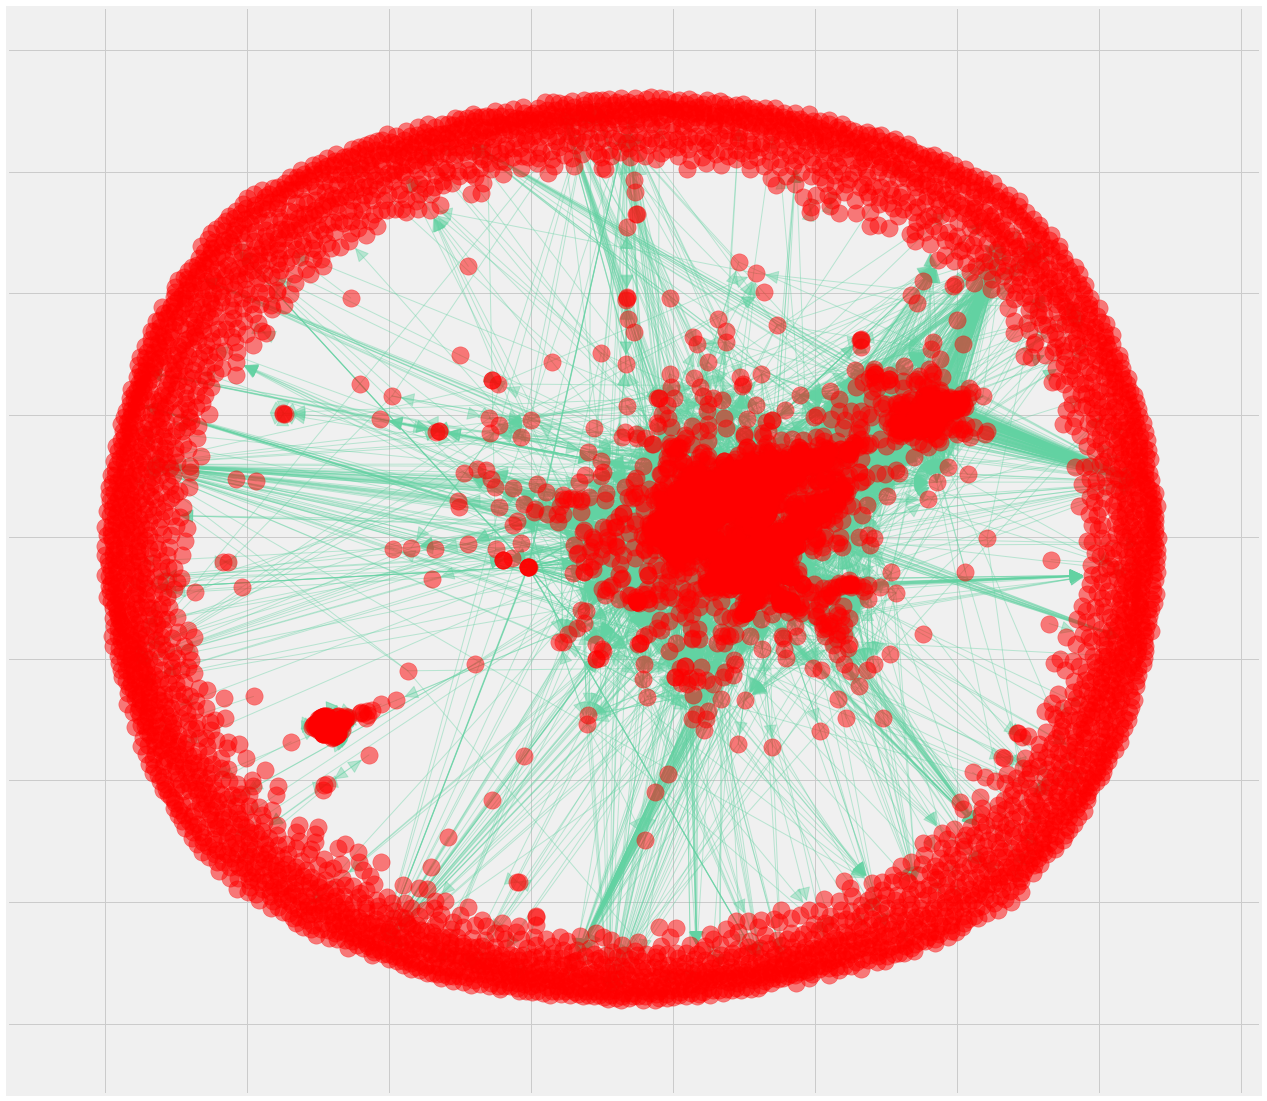

In [98]:

G = nx.DiGraph()

G.add_nodes_from(node_list)
G.add_edges_from(edge_list)


fig = plt.figure(figsize=(20,20))

pos = nx.layout.spring_layout(G)

# draw nodes
nodes = nx.draw_networkx_nodes(G, pos, nodelist=node_list, node_color='red', alpha=0.5)

# draw arrows
edges = nx.draw_networkx_edges(G, pos, edgelist=edge_list,edge_color='#62d2a2', rrowstyle='->',
                               arrowsize=30,alpha=0.4, width=1)



In [99]:
in_degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
in_degreeCount = collections.Counter(in_degree_sequence)
indeg, incnt = zip(*in_degreeCount.items())


out_degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
out_degreeCount = collections.Counter(out_degree_sequence)
outdeg, outcnt = zip(*out_degreeCount.items())

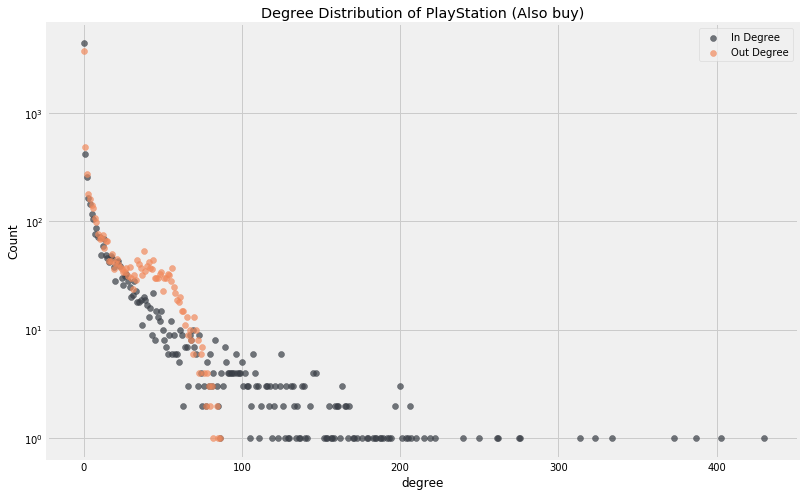

In [100]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)

plt.scatter(indeg, incnt, color='#393e46', alpha=0.7, label='In Degree')
plt.scatter(outdeg, outcnt, color='#f08a5d', alpha=0.7, label='Out Degree')

ax.set_title("Degree Distribution of PlayStation (Also buy)")
ax.set_ylabel("Count")
ax.set_xlabel("degree")
ax.set_yscale('log')
#ax.set_xscale('log')
ax.legend(loc='best')

plt.show()

In [101]:
edge_list = []
for product, view in zip(asin,also_view):
    if type(view) == str:
        view = [a.strip() for a in view.split(',')]
        if type(view) == list:
            for view2 in view:
                view2 = view2.strip('[')
                view2 = view2.strip(']')
                view2 = view2.strip("\\'")
                view2 = view2.strip("\\'")
                
                if view2 in node_list:
                    edge_list.append([product,view2])
                if view2 not in node_list:
                    pass
    else:
        pass


In [102]:

G2 = nx.DiGraph()

G2.add_nodes_from(node_list)
G2.add_edges_from(edge_list)


fig = plt.figure(figsize=(20,20))

pos = nx.layout.spring_layout(G2)

# draw nodes
#nodes = nx.draw_networkx_nodes(G2, pos, nodelist=node_list, node_color='red', alpha=0.5)

# draw arrows
#edges = nx.draw_networkx_edges(G2, pos, edgelist=edge_list,edge_color='#62d2a2', rrowstyle='->',arrowsize=30,alpha=0.4, width=1)



<Figure size 1440x1440 with 0 Axes>

In [103]:
in_degree_sequence2 = sorted([d for n, d in G2.in_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
in_degreeCount2 = collections.Counter(in_degree_sequence2)
indeg2, incnt2 = zip(*in_degreeCount2.items())


out_degree_sequence2 = sorted([d for n, d in G2.out_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
out_degreeCount2 = collections.Counter(out_degree_sequence2)
outdeg2, outcnt2 = zip(*out_degreeCount2.items())

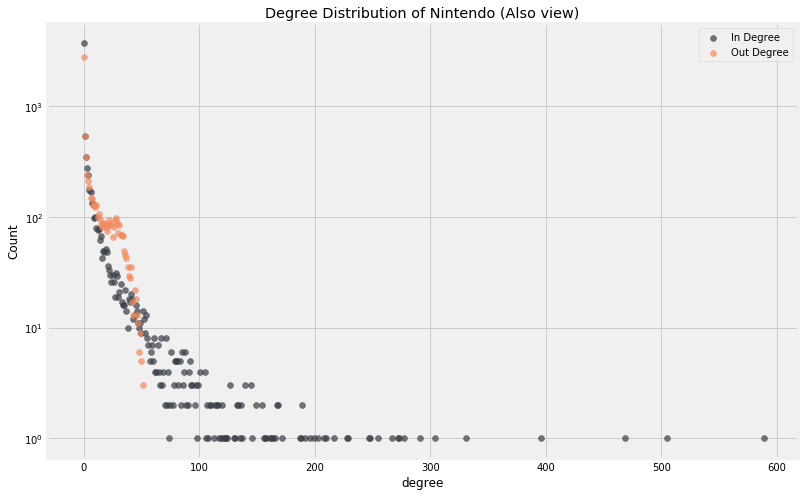

In [104]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)

plt.scatter(indeg2, incnt2, color='#393e46', alpha=0.7, label='In Degree')
plt.scatter(outdeg2, outcnt2, color='#f08a5d', alpha=0.7, label='Out Degree')

ax.set_title("Degree Distribution of Nintendo (Also view)")
ax.set_ylabel("Count")
ax.set_xlabel("degree")
ax.set_yscale('log')
#ax.set_xscale('log')
ax.legend(loc='best')

plt.show()

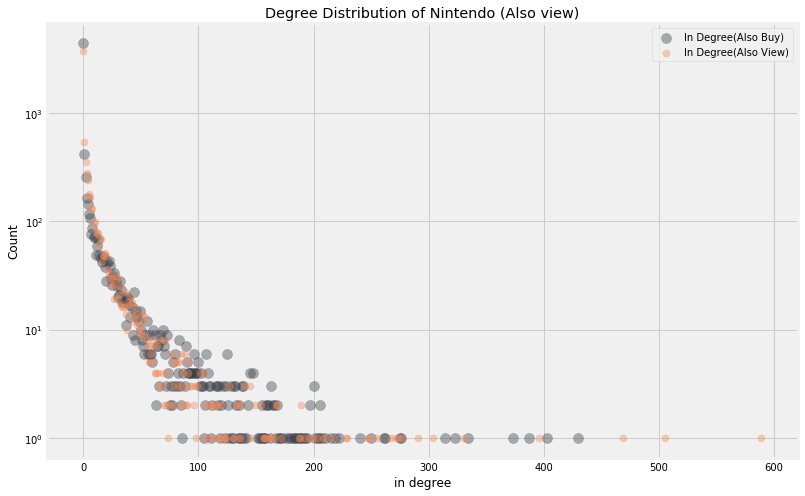

In [105]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)

plt.scatter(indeg, incnt, s=100, color='#393e46', alpha=0.4, label='In Degree(Also Buy)')
plt.scatter(indeg2, incnt2,s=50, color='#f08a5d', alpha=0.4, label='In Degree(Also View)')

ax.set_title("Degree Distribution of Nintendo (Also view)")
ax.set_ylabel("Count")
ax.set_xlabel("in degree")
ax.set_yscale('log')
#ax.set_xscale('log')
ax.legend(loc='best')

plt.show()
#fig.savefig('4')

In [106]:
inc = np.sum(incnt)
inc2 = np.sum(incnt2)

incntp = [i/inc for i in incnt]
incntp2 = [i/inc2 for i in incnt2]

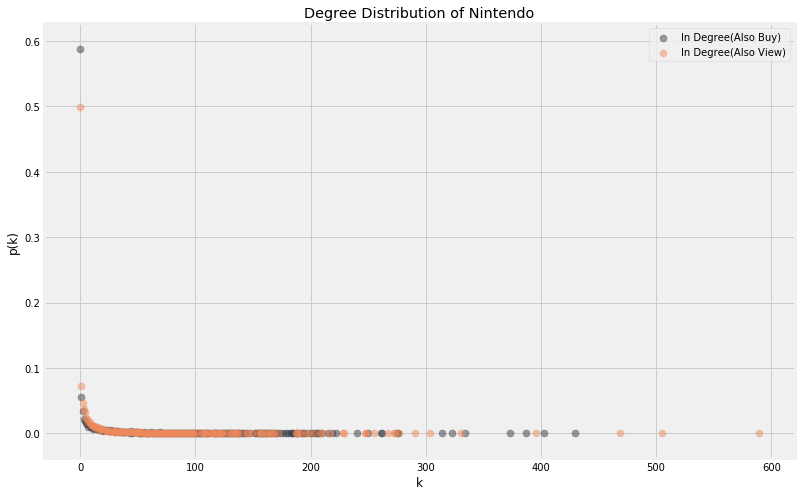

In [107]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)

plt.scatter(indeg, incntp, s=50, color='#393e46', alpha=0.5, label='In Degree(Also Buy)')
plt.scatter(indeg2, incntp2,s=50, color='#f08a5d', alpha=0.5, label='In Degree(Also View)')

ax.set_title("Degree Distribution of Nintendo")
ax.set_ylabel("p(k)")
ax.set_xlabel("k")
ax.legend(loc='best')

plt.show()
#fig.savefig('5')